# Optimal Execution with Continuous Trading using only Market Orders

# Overview

A classical problem in finance is how an agent can sell or buy a large amount of shares and yet minimize adverse price movements which are consequences of his own trades, hence there is a trade-off between **price impact** (trade quicker) and **price risk** (take longer). The agent must formulate a model to help him decide how to **optimally liquidate or acquire shares**, where the aim is to **minimize the cost of executing the trades and balance against price risk**.

**Execution cost** is the difference between a **benchmark price** (perfectly executed price in a market with no frictions) and the **actual price** (measured as the average price per share). If we use the mid-price of the asset at the time the order is given (**arrival price**), the execution cost would be known as the **implementation shortfall** or **slippage**.

The **fundamental price** of the asset (**efficient price, true price**) refers to price that reflects fundamental informations about the value of the firm. We assume that the fundamental price is the midprice which changes as new information is revealed to the market and is partly captured by the brownian motion.


# The base model

=> Applying (-) to liquidation problem and (+) to acquisition problems.

$dQ_{t}^{v} = \pm V_{t} dt, Q_{0}^{v} = q$ (**controlled inventory**)

$dS_{t}^{v} = \pm g(V_{t}) dt + \sigma dW_{t}, S_{0}^{v} = S$ (**midprice process**)

$\hat{S_{t}^{v}} = \pm (\frac{1}{2} \delta + f(V_{t}), \hat{S_{0}^{v}} = \hat{S}$ (**execution price**)

$dX_{t}^{v} = \hat{S_{t}^{v}} dt, X_{0}^{v} = x$ (**cash process**) and the expected revenue from the sale is $R_{v} = E[X_{t}^{v}] = E[ \int_{0}^{T} S_{t}^{v} V_{t} dt ]  $

$V_{t}$ : is the **trading rate**, the speef at which the agent is liquidating or acquiring shares (it is also the variable the agent controls in the optimisation process).

$Q_{t}^{v}$ : is the **agent's inventory**, which is clearly affected by how fast he trades.

$dS_{t}^{v}$ : is the **midprice process** and it is also affected in principle by the speed of the trading.

$\hat{S_{t}^{v}}$ : corresponds to the **price process** at which the agent can seel or purchase the asset (i.e the execution price by walking the LOB).

$X_{t}^{v}$ : is the **agent's cash** process resulting from the agent's execution strategy

$g: R_{+}$ -> $R_{+}$ : denotes the **permanent price impact**. An interpretation is that the agent is trading on information that reflects permanent changes in the value of the firm and market participants adjust their quotes in response to the agent's trade.

$f: R_{+}$ -> $R_{+}$ : denotes the **temporary price impact**. A **linear regression** between price impact and volume with intercept set to half-spread allows to describes a **linear impact function** $f(V_{t})$. However this linear regression provides an approximation during a short moment. Indeed the **impact model fluctuate throughout the day**, largest during the morning,flat during the day, and lessens at the close. However we will assume the relation to be constant and linear $f(V_{t}) = k * V_{t}$.

We will now look at different strategies to trade a block of shares using only MOs, where each strategy make different assumptions about how the agent penalises and/or controls inventory and how the rate of trading affects the execution price as well as the midprice of the asset.

# Liquidation without penalties only temporary impact

The agent uses only MOs to liquidate n shares between t = 0 and T. The agent doesn't impact the midprice $g(v_{t} = 0)$ but because MOs walk the book, it will have a temporary impact that is linear in the speed of trading $f(V_{t}) = k * V_{t}$.

The agent seeks to maximise the revenue from the sale, which amount to finding the liquidation strqtegy that minimizes the execution cost $ EC_{V} = n S_{0} - E[ \int_{0}^{T} S_{t}^{v} V_{t} dt ]$, which is equivalent to maxising the expected revenues from the target sale $ sup_{v \in A} E_{t, s, q}[ \int_{t}^{T} (S_{u} - k V_{u})  V_{u} du ]$.

The optimal inventory to hold is $Q_{t}^{V*} = (1 - \frac{t}{T}n)$ and the speed of trading is $V_{t*} = \frac{n}{T}$. This result is really simple, the shares must be liquidated at a constant rate and this strategy is the same as that of the **time weighted average price (TWAP)**.

# Optimal acquisition with terminal penalty and temporary impact
The problem now is to acquire n shares by time T with $Q_{0}^{V} = 0$ but the agent allows strategies that fall short of this $Q_{T}^{V} < n$. In this case the agent must execute a buy MO for the remaining amount and pich up an additional penalty. This terminal inventory penalty is parameterised by $\alpha > 0$ which includes the cost of walking the book a T and other additional penalties that the agent must incur for the execution of the trade at the terminal date.

Thus the agent's expected costs from strategy $V_{t}$ is $ EC_{V} = [ \int_{t}^{T} \hat{S_{u}^{v} V_{u} du} + (n - Q_{t}^{v}) S_{T} + \alpha(n-Q_{T}^{v})^{2}] $ (terminal cash + terminal execution at midprice + terminal penalty).

The optimal invetory path will be  $Q_{t}^{v*} = \frac{t}{T+\frac{k}{\alpha}}n$ and the optimal speed of acquisition $V_{t}^{*} = \frac{n}{T+\frac{k}{\alpha}}$. 

As the penalty $\alpha$ -> $\infty$ the acquisition rate converge to hat of TWAP. Similarly the lower $\alpha$, the slower the acqusition rate. As $\alpha$ -> 0, the best is to purchase all share at T as there are no cost of walking the book at T. In general however $\alpha >> k$.

We can see it is always optimal to leasve shares to be executed at the terminal date, and  the fraction  of shares left to execute at the end decreases with the relative price impact at the terminal date $\frac{k}{\alpha}$. The agent acquires at a constant but slower rate than that of an agent who must execute everything at T. Another way to see it is that the agent must execute everything at $T^{'} = T + \frac{k}{\alpha}$.

# Liquidation with permanent and temporary price impact and inventory penalty
Now the trades have both a temporary $f(V_{t}) = k * V_{t}$ and permanent price impact $g(V_{t}) = b * V_{t}$, both linear in the speed of trading. 

We also introduce another element into the model. A running inventory penalty of the form $\phi \int_{t}^{T}(Q_{u}^{v})^{2}$. This running inventory penalty is not (and should not be considered) a financial cost ot the agent's strategy. The parameter $\phi$ allow us to incorporate the agent's urgency for executiong the trade. It can be shown that the running inventory penalty is equivalent to introducing ambiguity aversion on the part of the agent, where the ambiguity is over the midprice which may have a non-zero stochastic drift.

$ sup_{v \in A} E_{t, x, s, q}[ X_{T}^{v} + Q_{T}^{v} (S_{T}^{v} - \alpha Q_{T}^{v}) - \phi \int_{t}^{T}(Q_{u}^{v})^{2}$ (terminal cash + terminal execution - inventory penalty).

$\gamma = \sqrt{\frac{\phi}{k}}$ and 

$\zeta = \frac{\alpha - \frac{1}{2}b + \sqrt{k \phi }
}{\alpha - \frac{1}{2}b - \sqrt{k \phi }}$ 

$Q_{t}{v*} = \frac{\zeta e^{\gamma (T - t)} + e^{ - \gamma (T - t)}}    {\zeta e^{\gamma T} - e^{ - \gamma T}}n$

$V_{t}{*} = \gamma \frac{\zeta e^{\gamma (T - t)} + e^{ - \gamma (T - t)}}    {\zeta e^{\gamma T} - e^{ - \gamma T}}n$

The optimal speed to trade is still proportional to the investor's current inventory level but now the proportionality depends non-linearly on time. In other words the optimal speed to trade is simply a deterministic function of time.

Note that with no running penalty $\phi = 0$, the strategies are straight lines and in particular with $\alpha$ -> $\infty$, the strategies are equivalent to a TWAP. As the running penalty $\phi$ increases, the trading curve become more convex and the optiminal strategy aims to sell more sooner.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def inter_extrapolation(x, y, e):
    """ Extrapolation and interpolation.
    
    :param x: a numpy array
    :param y: a numpy array
    :param e: a numpy array, equivalent of x
    :return: a numpy array
    """
    new_x = np.sort(x)
    new_y = y[np.argsort(x)]

    def point_wise(ep):
        if ep < new_x[0]:
            return new_y[0] + (ep - new_x[0]) * (new_y[1] - new_y[0]) / (new_x[1] - new_x[0])
        elif ep > new_x[-1]:
            return new_y[-1] + (ep - new_x[-1]) * (new_y[-1] - new_y[-2]) / (new_x[-1] - new_x[-2])
        else:
            return np.interp([ep], x, y)[0]
    return np.array([point_wise(i) for i in e])

def calculate_inventory_trading_speed(alpha, phi, t, tt, T, b, k):
    """ For given points t, this function solve for the optimal speed of trading as nu, and investor's inventory along the
        optimal path as Q. 
        This function also returns optimal speed of trading as nut, and investor's inventory along the optimal path Qt as a
        function of time, tt, which is a vector of "infinitely" small time interval.
    """
    tau = T - t
    zeta = ((alpha - 0.5 * b) + np.sqrt(k * phi)) / ((alpha - 0.5 * b) - np.sqrt(k * phi))
    gamma = np.sqrt(phi / k)
    chi = np.sqrt(k * phi) * np.divide(1 + zeta * np.exp(2 * gamma * tau), 1 - zeta * np.exp(2 * gamma * tau))
    Q = np.divide(zeta * np.exp(gamma * tau) - np.exp(-gamma * tau), zeta * np.exp(gamma * T) - np.exp(-gamma * T))
    nu = np.multiply(-chi, Q) / k
    Qt = inter_extrapolation(t, Q, tt)
    nut = inter_extrapolation(t, nu, tt)
    return Q, nu, Qt, nut

def plot_inventory_trading_speed(alpha0, phi, symb, t, tt, T, b, k, labels, main):
    """ This function plots Fig 6.2 using above function to calculate inventory and speed of tading vs time.
    """
    fig, (ax_inv, ax_trad) = plt.subplots(ncols=2)
    fig.set_size_inches(10.5, 5.5)
    color_idx = np.linspace(0, 1, phi.shape[0])
    for i, line in zip(color_idx, range(0, phi.shape[0])):
        inv_line, trad_line, inv_dot, trad_dot = calculate_inventory_trading_speed(alpha0, phi[line], t, tt, T, b, k)
        plt1, = ax_inv.plot(tt, inv_dot, color=plt.cm.rainbow(i), label=labels[line], marker=symb[line], linestyle='None')
        plt2, = ax_trad.plot(tt, trad_dot, color=plt.cm.rainbow(i), label=labels[line], marker=symb[line], linestyle='None')
        plt3, = ax_inv.plot(t, inv_line, linestyle='-', color=plt.cm.rainbow(i))
        plt4, = ax_trad.plot(t, trad_line, linestyle='-', color=plt.cm.rainbow(i))
    ax_inv.legend()
    ax_inv.set_xlabel(r"Time", fontsize=18)
    ax_inv.set_ylabel(r"Inventory", fontsize=18)
    ax_trad.legend()
    ax_trad.set_xlabel(r"Time", fontsize=18)
    ax_trad.set_ylabel(r"Trading Speed", fontsize=18)
    ax_trad.yaxis.set_label_coords(-0.1,0.5)
    plt.suptitle(main, fontsize=20)
    fig.canvas.draw()

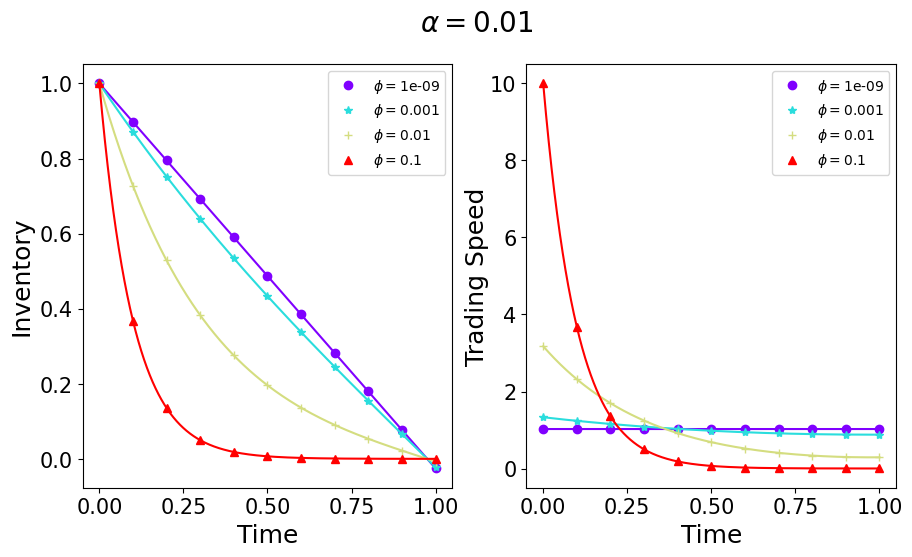

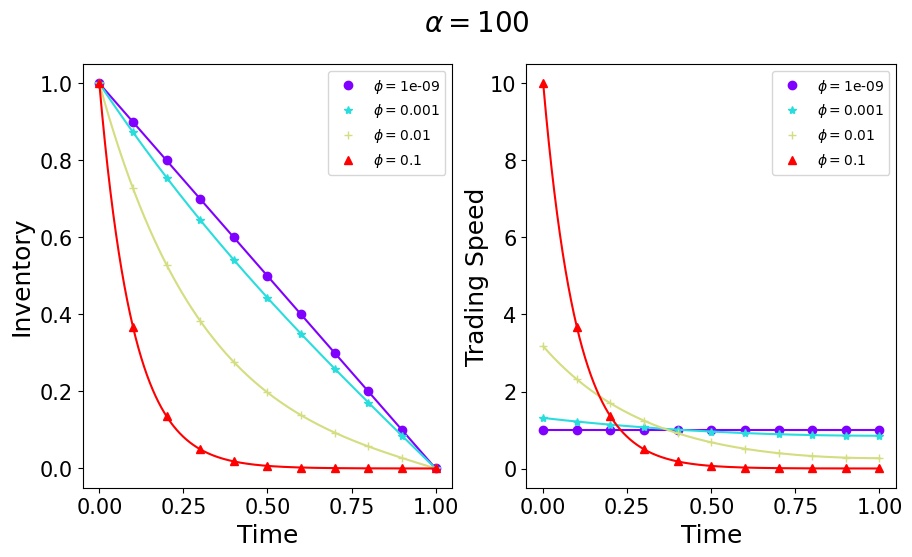

In [36]:
# Parameter settings

T = 1 # length of the trading session
Ndt = 6.5 * 3600 # number of discrete time increment in the trading session
dt = T / Ndt # length of each discrete increment 
t = np.arange(0, T + dt, dt) # array from start to end of trading period with discrete increment 

k = 0.001 # temporary impact 
b = 0.001 # permanent impact 

tau = T - t # array of the remaining time in the trading session 
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([10e-10, 0.001, 0.01, 0.1]) # penality from running inventory
symb = np.array(["o", "*", "+", "^"]) # their corresponding symbol

alpha = 100 # penality from acquiring the remaining inventory at the end of the trading session

# run simulation 
plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 100$")

# Execution with exponential utility maximiser
Till now the agent was viewed as a risk-neutral in the sense that he is maximizing his expected terminal wealth. What can be shown is that if the agent is risk-averse with exponential utility then he act in the same manner as the risk-neutral, but inventory averse agent with $u(x) = - e^{- \gamma x}$ and so we aim to maximise $ sup_{v \in A} E_{t, x, s, q}[ - e^{- \gamma (X_{T}^{v} + Q_{T}^{v} (S_{T}^{v} - \alpha Q_{T}^{v}))}]$



# Non-linear temporary price impact

We assumed that the price impact function to be linear in the speed of trading $f(V_{t}) = k * V_{t}$, which is a good approximation but some researchers have shown that a power law with power less than one fits the data better. Others also argue that given the extremely complexity arising from moving away from a linear model would outweighs any gains from better describing market impact. 

The result is that as the power law parameter decreases, so that orders of the same size have less and less of an impact, the agent liquidates faster. The intuition here is that since trading does not impact prices as much, the agent prefers to liquidate shares early and reduce her inventory risk, and doing so does not cause her to lose too much from temporary market impact. In some sense the agent behaves as if he has a larger urgency parameter, but still uses a linear impact model.

In [42]:
def solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq):
    """ This function solves for optimal trading speed in feed back form as nus, and inventory of optimal path as Qs.
    They are used to be presented as a function of time, t.
    """
    t = np.arange(0, T+dt, dt)
    q = np.arange(0, qmax+dq, dq)

    myleg = []

    nus = np.full((Ndt+1, a.shape[0]), np.nan)
    Qs = np.full((Ndt+1, a.shape[0]), np.nan)
    Qs[0,:] = qmax

    for i in range(0, a.shape[0], 1):
        xi = (a[i] * k) / ((1 + a[i]) * k) ** (1 + 1/a[i])

        g = np.full((Ndq+1, Ndt+1), np.nan)
        nu = np.full((Ndq+1, Ndt+1), np.nan)
        
        g[:, g.shape[1]-1] = -(alpha ** a[i]) / k ** (a[i] - 1) * np.power(q, 1 + a[i]) + 0.5 * b * np.power(q, 2)

        for j in range(Ndt-1, -1, -1):

            # Explicit Scheme
            dqg = (g[1:g.shape[0], j+1] - g[0:(g.shape[0]-1), j+1]) / dq
            g[1:g.shape[0], j] = g[1:g.shape[0], j+1] + dt * (-phi * np.power(q[1:q.shape[0]], 2) + xi * (np.power(-dqg, 1 + 1 / a[i])))
            g[0, j] = 0

            dqg = (g[1:g.shape[0], j] - g[0:(g.shape[0]-1), j]) / dq
            nu[1:nu.shape[0], j] = np.power(-dqg / ((1 + a[i]) * k), 1 / a[i])
            nu[0, j] = 0

            # Implicit-explicit scheme
            g[:, j] = np.real(g[:, j])
            nu[:, j] = np.real(nu[:, j])

        for j in range(0, Ndt, 1):
            nus[j, i] = inter_extrapolation(q, nu[:, j], [Qs[j, i]])
            Qs[j+1, i] = Qs[j, i] - nus[j, i] * dt

        myleg.append("$a=" + str(a[i]) + "$")
    return nus, Qs, myleg, t, q

def plot_multiple(x, y, xlab=None, ylab=None, main=None, labels=None):
    """ This is a plotting function intended to plot multiple Ys for a single x.
    """
    color_idx = np.linspace(0, 1, y.shape[0])
    for i, line in zip(color_idx, range(0, y.shape[0])):
        if labels is not None:
            plt.plot(x, y[line, :], color=plt.cm.rainbow(i), label=labels[line], linestyle='-')
        else:
            plt.plot(x, y[line, :], color=plt.cm.rainbow(i), linestyle='-')
    if xlab is not None:
        plt.xlabel(xlab, fontsize=18)
    if ylab is not None:
        plt.ylabel(ylab, fontsize=18)
    if main is not None:
        plt.title(main, fontsize=12)
    if labels is not None:
        plt.legend()
    plt.show()


/var/folders/sn/93qsdnkd1w7cb1lwydfyy9480000gn/T/ipykernel_27492/859826378.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nus[j, i] = inter_extrapolation(q, nu[:, j], [Qs[j, i]])


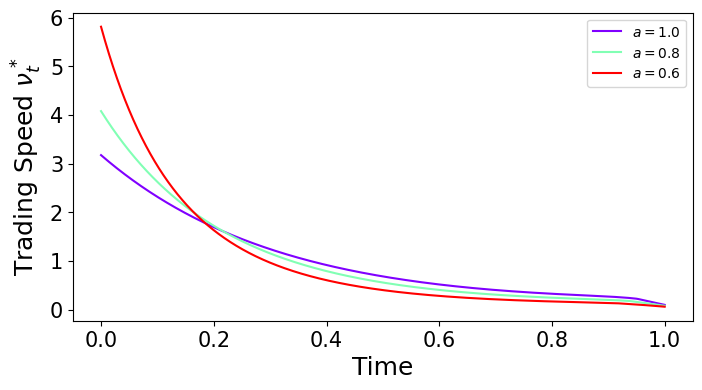

In [43]:
# Parameter Settings
a = np.array([1, 0.8, 0.6])
k = 0.0001 # temporary impact 
b = 0.0001 # permanent impact 

phi = 10 * k
alpha = 100 * k # penality from acquiring the remaining inventory at the end of the trading session
T = 1
qmax = 1

Ndt = 10000
Ndq = 100

dt = T / Ndt
dq = qmax / Ndq

nus, Qs, myleg, t, q = solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq)

plot_multiple(t, nus.T, r"Time", r"Trading Speed $\nu^*_t$", None, myleg)

# Transition to more advanced models

We studied the problem of optimal execution for an agent who aims to liquidate/acquire a considerable proportion of the **average daily volume (ADV)** of shares. We saw how the agent trades off the impact on prices that trades would have if he traded quickly, with the uncertainty in prices he would receive/pay if he traded slowly. 

**The agent's optimal strategy is to trade quickly initially (ensuring that he receives a price close to the arrival price, but with a non-trivial impact) and then slow down as time goes by (to reduce the overall impact, but increase price uncertainty).**

**Surprisingly, the optimal strategies we obtain are deterministic and in particular are independent of the midprice process - regardless of the level of urgency required to complete the trade.**

We now incorporate a number of other important aspects of the problem that the agent may wish to include :

(1) **An upper price limit**: the optimal strategy in this case is no longer independent of the midprice, beyond the obvious change that the agent stops trading when the upper limit price is breached.
    
(2) **Informative order flow**: taking into account the order flow from other traders in the market also impacts the midprice. The agent alters the strategy so that when the net effect of other market participants is to trade in his direction, he increases his trading speed; con­versely, if the net effect of other agents is to trade in the opposite direction, he decreases the trading speed.
    
(3) **Dark pools**: the agent has access to a (standard) lit market and also to a dark pool. Trading in the dark pool exposes to execution risk, but removes some of the price impact. The optimal strategy is still deterministic: initially the agent trades in the lit market at speeds below that dictated by Almgren & Chriss (2000) (AC), and posts the whole of the remaining order in the dark pool, in the hope of it being filled there.

# Optimal acquisition with a price limiter
The agent wants to acquire n shares over a trading horizon of T, with a cap on the price of $\bar{S}$. If the midprice reaches the limit before T, all remaining shares are immediately purchased. The midprice follows with $g(V_{t}) = b * V_{t}$ and the execution price with $f(V_{t}) = k * V_{t}$. The agent will stop trading if any one of the following events occur:

(a) The agent's inventory reaches the target level n at $\tau$,

(b) The terminal time T is reached

(c) The midprice $S_{t}$ reaches the upper limit price $\bar{s}$

when either (b) or (c) occur, the agent acquires the remaining $n - Q_{t}^{v}$ units of security and pays $S_{t} + \alpha (n-Q_{t}^{v})$ per unit. To simplify let $Y_{t}^{v} = n-Q_{t}^{v}$ denote the remaining shares to be acquired, satisfying $dY_{t}^{v} = - v_{t} dt$ where $v_{t}$ is the positive rate of trading.

$ H(t, s, y) = inf_{v \in A} E_{t,s, y}[ \int_{t}^{\tau}(S_{u} + k v_{u}) v_{u} du + Y_{\tau} (S_{\tau} + \alpha Y_{\tau}) + \phi \int_{t}^{\tau} Y_{u}^{2} du $

In general, the PDE obtained will have to be solved numerically, however in practice it is normally the case that the effect of permament impacts is much smaller than the temporary impact from walking the LOB, so to reduce the dimension of the problem it is possible to set b = 0. The optimal acquisition strategy $v^{*}(t, s, y) = \frac{1}{k}yh(t, s)$. It follows that as inventory Q increases (so that Y decreases), all else being equal, the optimal rate of acquisition slow down.

Since the optimal trading rate $v^{*}(t, s, y) = \frac{1}{k}yh(t, s)$, the inquality $\Chi(t) \le h(t, s) \le \alpha $ implies that at each inventory level, the agent with the limit price constraint trades at least as fast as the agent without the limit price, and attains a maximal speed of trading of $\frac{\alpha}{k}$. This implies that the agent with the limit price constraint will have acquired more shares than the agent without the constraint at any given fixed point in time.

$Q_{t}^{*} = (1 - e^{- \frac{1}{k} \int_{0}^{t} h(u, S_{u}) du})n$ this has the same form as in the case without the limit price but here the path that the midprice takes plays an important role in determining how much the agent has at any given time.

The agent's speed of trading increases (for the same fixed amount of inventory) as the limit price $\bar{S}$ is approached from below. This is natural, since the agent observes the price getting closer to the limit and therefore wishes to acquire as many shares as possible prior to breaching the price cap without paying too much in immediate impact costs. Note, however, as inventory is acquired, the speed of trading slows down. The net result of these two opposing effects will depend on which of the two is stronger.

As the fundamental price approaches the limit price, the speed of trading increases to avoid the penality (same when maturity approaches). In the case with no limit price, the agent's optimal strategy is independent of the asset's volatility. The more volatile the market, the faster the agent trades, but as price moves far away from the limit price, the effect of volatility diminishes. 

As expected, the mean inventory path lies above the AC strategy, since the trading speed for the same level of inventory must lie above the AC strategy as dictated by the maximum principle and encoded in the inequality.

The inequality, does not, however, imply that the trading speed will always lie below the AC trading speed. This is because the inventory level varies with the sample path and will not generally equal that of the AC inventory. The intuition for this is that since the optimal strategy requires the agent to trade more quickly than the AC, the inventory is generally higher (and closer to the target inventory) than if the agent were trading according to the AC strategy. Since the agent eventually has less inventory, his trading speed generally slows down.


In [59]:
# Importing Packges
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(20)  # Setting random seed
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pylab as pylab
params = {'legend.fontsize': 10,
          'figure.figsize': (8, 4),
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize': 15,
         'ytick.labelsize': 15}
pylab.rcParams.update(params)
font = {'family': 'serif',
        'style': 'italic',
        'weight': 1,
        'size': 16,
        }


In [64]:
def solve_pde_hjb(Fmin, Fmax, NdF, alpha, phi, k, sigma, T, Ndt):
    # Initialization
    dt = T/Ndt  # Time change increment
    dF = (Fmax - Fmin)/(NdF - 1)
    h = np.full([NdF, Ndt+1], np.nan)  # Solution

    h[:, -1] = alpha  # Boundary/Terminal Condition
    ainv = 1/k
    dtanddF = 0.25*dt/(dF**2) # coefficient that shows up in the FD method

    # the M matrix in the Crank-Nicholson scheme
    M = np.zeros([NdF-2, NdF-2])
    M[0, 0] = 1
    M[NdF-3, NdF-3] = 1 + 2*dtanddF*sigma**2
    M[NdF-3, NdF-4] = -dtanddF*sigma**2

    for i in range(2, NdF-2):
        i_0 = i-1
        M[i_0, i_0-1] = - dtanddF*sigma**2
        M[i_0, i_0] = 1 + 2*dtanddF*sigma**2
        M[i_0, i_0+1] = - dtanddF*sigma**2
    Minv = np.linalg.inv(M)
    
    
    for i in range(Ndt-1, -1, -1):

        H = h[:, i+1].reshape(h.shape[0], 1)
        E = np.full([NdF, 1], np.nan)
        E[1:NdF-1] = H[1:NdF-1] \
        + dtanddF*(sigma**2)*(H[2:NdF] - 2*H[1:NdF-1] + H[:NdF-2]) \
        - dt*ainv*np.power(H[1:NdF-1], 2) + dt*phi
        
        v = E[1: NdF-1]

        v[NdF-3] = v[NdF-3] + dtanddF * sigma**2 * alpha

        h[1:NdF-1, i] = (Minv@v).reshape(NdF-2,)

        h[NdF-1, i] = alpha
        h[0, i] = 2*h[1, i] - h[2, i]

    t = np.arange(0, T+10**-9, dt)
    F = np.arange(Fmin, Fmax+10**-9, dF)
    return h, F, t

# Plot Path for Price VS Time
def PlotPricePathMap(T, t, F, Fmin, Fmax, S, idxfig, lw):
    fig_1 = plt.figure()
    axes = fig_1.gca()
    axes.set_xlim((0, T))
    axes.set_ylim([Fmin-0.05, Fmax+0.05])
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)

    F[S==0] = np.nan
    for i in range(len(idxfig)):
        plt.plot(t, F[idxfig[i]], linewidth=lw, label=i+1)
    plt.hlines(Fmax, 0, T, linestyles='dotted')
    plt.legend(['1', '2', '3'], loc='lower right')
    plt.ylabel('Fundamental Price ' + r'$(S_t)$',  fontdict=font)
    plt.xlabel('Time ' + r'$(T)$',  fontdict=font)

# Plot Path for Inventory VS Time
def PlotInvPathMap(t, Q_AC, Q, idxfig, lw):
    fig_2 = plt.figure()
    axes = fig_2.gca()
    axes.set_xlim(left=0)
    axes.set_ylim(bottom=0)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)

    plt.plot(t, Q_AC[0, :], linestyle='dotted', linewidth=3, label='AC')
    for i in range(len(idxfig)):
        plt.plot(t, Q[idxfig[i], :], linewidth=lw, label=i+1)

    plt.legend()
    plt.ylabel('Inventory ' +r'$(Q_t)$', fontdict=font)
    plt.xlabel('Time ' + r'$(T)$', fontdict=font)

# Plot Path for Trade Speed VS Time
def PlotTradeSpeedPathMap(T, t, nu_AC, nu, idxfig, lw):
    fig_3 = plt.figure()
    axes = fig_3.gca()
    axes.set_xlim((0, T))
    axes.set_ylim([0, max(nu_AC[0,:])*1.25])
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)

    plt.plot(t, nu_AC[0, :], linestyle='dotted', linewidth=3, label='AC')
    for i in range(len(idxfig)):
        plt.plot(t, nu[idxfig[i]], linewidth=lw, label=i+1)

    plt.ylabel('Trading Speed ' +r'$(v_t)$', fontdict=font)
    plt.xlabel('Time ' + r'$(T)$', fontdict=font)
    plt.legend()

# Plot Path for Cost per Share VS Time
def PlotCostPathMap(t, X, Q, F0, Fmax, idxfig, lw):
    fig_4 = plt.figure()
    axes = fig_4.gca()
    axes.set_xlim(left=0)
    axes.set_ylim([F0*0.99, Fmax])
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)
    for i in range(len(idxfig)):
        plt.plot(t, np.divide(X[idxfig[i]], Q[idxfig[i], :]), linewidth=lw, label=i+1)
    plt.ylabel('Cost per Share', fontdict=font)
    plt.xlabel('Time ' + r'$(T)$', fontdict=font)
    plt.legend()

# Plot Heat Map for Inventory VS Time
def PlotInvHeatMap(t, Q, Q_AC, lower_cutoff, Nsims):
    fig_5 = plt.figure()
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)

    count_mat_i = np.full([np.arange(0, 1, 0.01).shape[0], len(t)], np.nan)
    for i in range(len(t)):
        count_mat_i[:, i] = np.histogram(Q[:, i], bins=np.arange(0, 1.001, 0.01))[0]
    x_cord_i, y_cord_i = np.meshgrid(t, np.arange(0, 1, 0.01))
    count_mat_i[count_mat_i <= lower_cutoff] = 0
    z = count_mat_i/Nsims
    cmap = plt.get_cmap('YlOrRd')
    plt.contour(x_cord_i, y_cord_i, z, 100, cmap=cmap, levels=np.linspace(z.min(), z.max(), 1000))
    plt.colorbar(ticks=np.arange(0, 1, 0.1))

    plt.plot(t, Q.mean(axis=0), linewidth=2, linestyle='-', color='blue', label = 'Optimal Inv')
    plt.plot(t, Q_AC.mean(axis=0), linewidth=2, linestyle='--', color='black', label = 'AC Inv')
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.ylabel('Inventory ' +r'$(Q_t)$', fontdict=font)
    plt.xlabel('Time ' + r'$(T)$', fontdict=font)
    plt.legend()

# Plot Heat Map for Trading Speed VS Time
def PlotTradeSpeedHeatMap(t, nu, nu_AC, lower_cutoff, Nsims):
    fig_6 = plt.figure()
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)

    count_mat_ts = np.full([np.arange(0, 5, 0.025).shape[0], len(t)], np.nan)

    for i in range(len(t)):
        count_mat_ts[:, i] = np.histogram(nu[:, i], bins=np.arange(0, 5+0.0001, 0.025))[0]
    x_cord_ts, y_cord_ts = np.meshgrid(t, np.arange(0, 5, 0.025))
    count_mat_ts[count_mat_ts <= lower_cutoff] = 0
    z_ts = count_mat_ts/Nsims
    cmap = plt.get_cmap('YlOrRd')
    plt.contour(x_cord_ts, y_cord_ts, z_ts, 100, cmap=cmap, levels=np.linspace(z_ts.min(), z_ts.max(), 1000))
    plt.colorbar(ticks=np.arange(0, 1, 0.1))

    plt.plot(t, nu.mean(axis=0), '-b', linewidth=2, label = 'Optimal Average Trade Speed')
    plt.plot(t, nu_AC[0, :], '--k', linewidth=2, label = 'AC Average Trade Speed')
    plt.ylabel('Trading Speed ' +r'$(v_t)$', fontdict=font)
    plt.xlabel('Time ' + r'$(T)$', fontdict=font)
    plt.legend()

# Plot Histagram for Price
def PlotPriceHist(X, Q):
    fig_6 = plt.figure()
    axes = fig_6.gca()
    data = np.divide(X[:, -1], Q[:, -1])
    axes.set_xlim(xmin = np.percentile(data, 1), xmax = np.percentile(data, 99))
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)

    upper = np.percentile(data, 99)
    lower = np.percentile(data, 1)
    plt.hist(data, np.arange(lower, upper, (upper-lower)/50))
    plt.tick_params(axis="x", width=(upper-lower)/5)

    plt.ylabel('Frequency', fontdict=font)
    plt.xlabel('Price', fontdict=font)

# Plot Histagram for Price of AC Strategy
def PlotPriceACHist(X_AC, Q_AC):
    fig_7 = plt.figure()
    data = np.divide(X_AC[:, -1], Q_AC[:, -1])
    axes = fig_7.gca()
    axes.set_xlim(xmin = np.percentile(data, 1), xmax = np.percentile(data, 99))
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)
    
    upper = np.percentile(data, 99)
    lower = np.percentile(data, 1)
    plt.hist(data, np.arange(lower, upper, (upper-lower)/50))
    plt.tick_params(axis="x", width=(upper-lower)/5)

    plt.ylabel('Frequency', fontdict=font)
    plt.xlabel('Price_AC', fontdict=font)

# Plot Histagram for Price Difference between optimal and AC Strategy
def PlotPriceDifHist(X, X_AC):
    fig_9 = plt.figure()
    data = np.subtract(X[:, -1], X_AC[:, -1])
    axes = fig_9.gca()
    axes.set_xlim(xmin = np.percentile(data, 1), xmax = np.percentile(data, 99))
    
    upper = np.percentile(data, 99)
    lower = np.percentile(data, 1)
    plt.hist(data, np.arange(lower, upper, (upper-lower)/50))
    plt.tick_params(axis="x", width=(upper-lower)/5)
 
    plt.ylabel('Frequency', fontdict=font)
    plt.xlabel('Price_Diff', fontdict=font)

# Plot Histagram for I (Name to be finalized)
def PlotIHist(I):
    fig_11 = plt.figure()
    axes = fig_11.gca()
    axes.set_xlim(xmin = np.percentile(I, 1), xmax = np.percentile(I, 99))
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)
    
    upper = np.percentile(I, 99)
    lower = np.percentile(I, 1)
    plt.hist(I, np.arange(lower, upper, (upper-lower)/50))
    plt.tick_params(axis="x", width=(upper-lower)/5)

    plt.ylabel('Frequency', fontdict=font)
    plt.xlabel('Cost', fontdict=font)


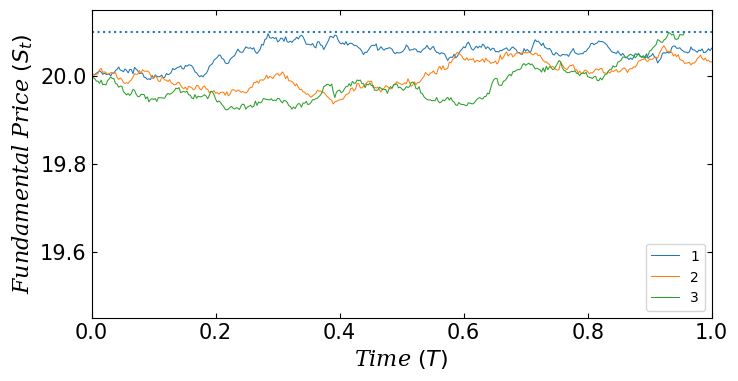

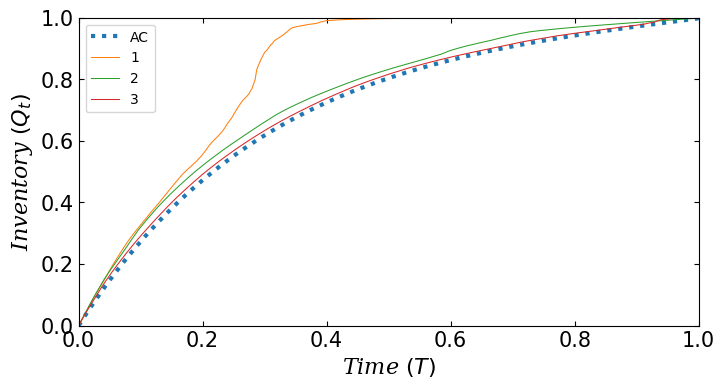

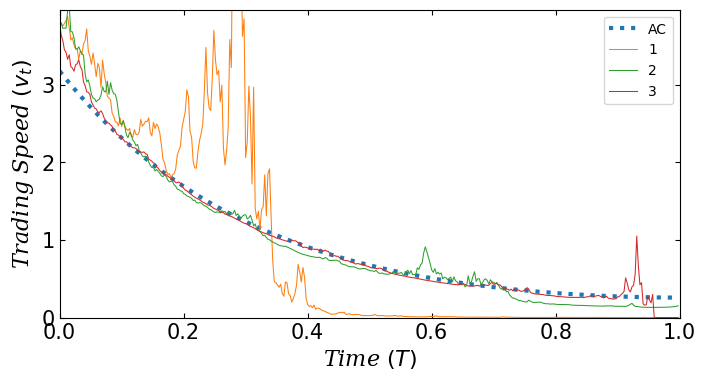

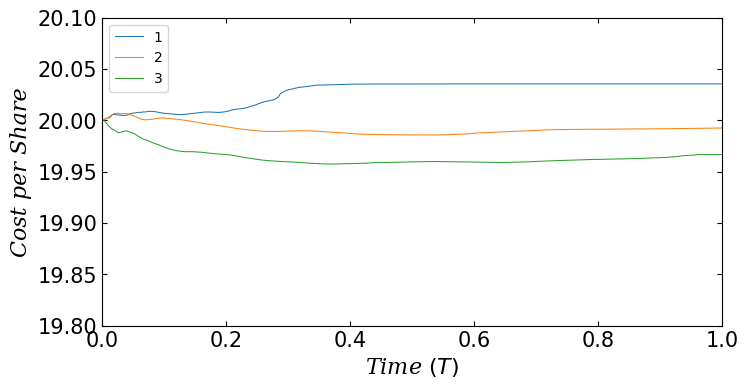

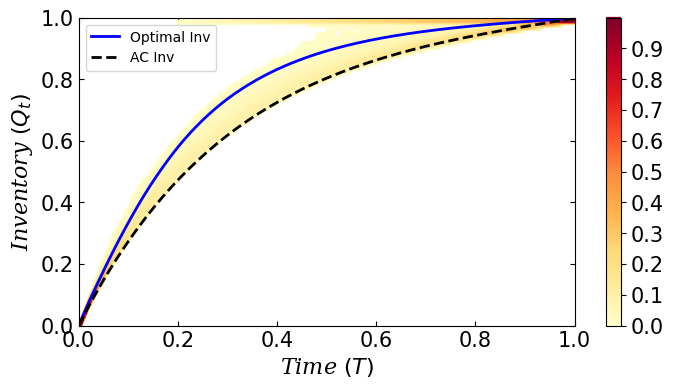

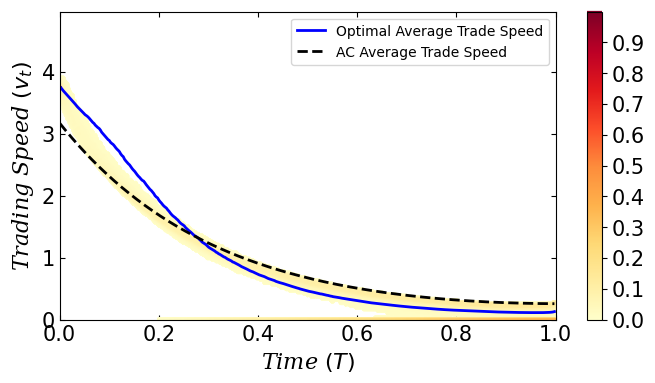

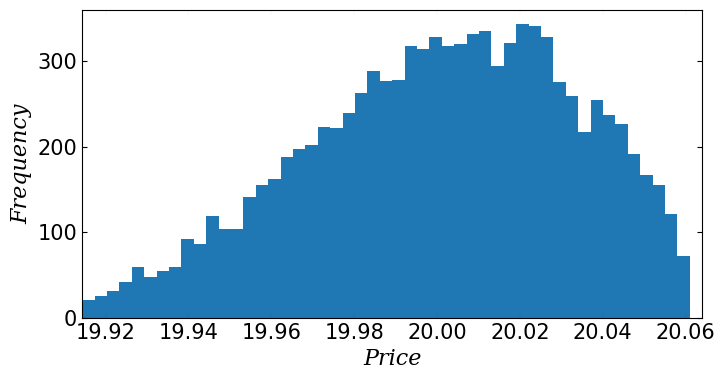

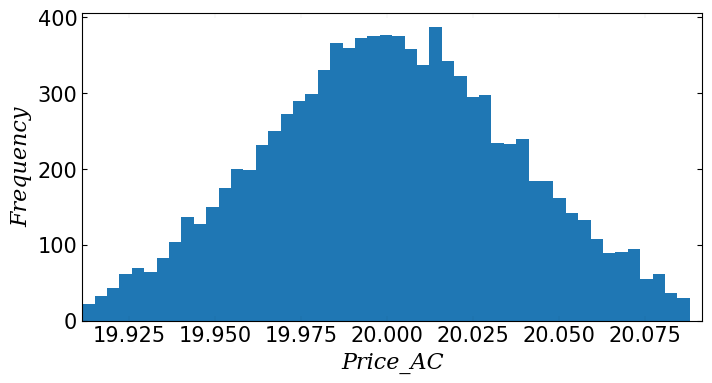

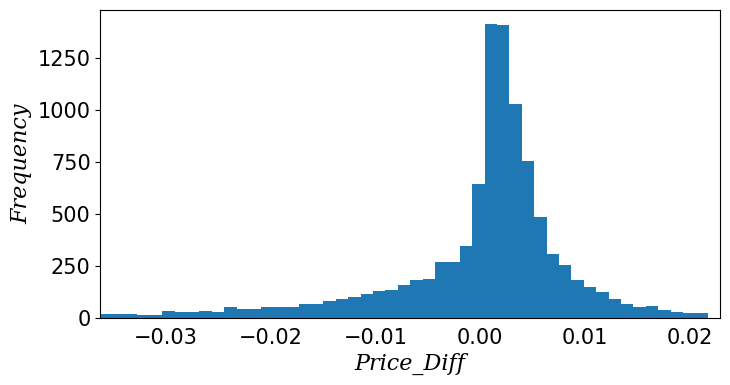

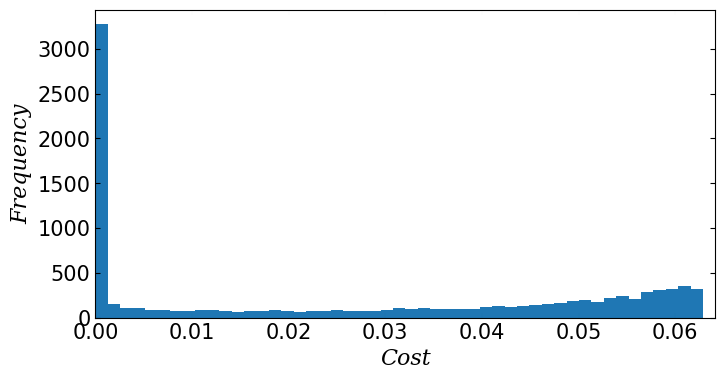

In [65]:
lw = 0.75  # Line width in plots
Nsims = int(10000)  # Number of simulations

# time grid
T = int(1) # Expiry
Ndt = int(6.5*60)  # Number of time increments
dt = T/Ndt  # Time change increment

N = 1  # Target Inventory
sigma = 0.1  # volatilty (recall this is an artihmetic model)

k = 1*10**(-4)  # Temporary Market Impact
b = 0  # permanent price impact factor

phi = 1 * 10**(-3)  # Running penalty coefficient
alpha = 100 * k  # Barrier and terminal penalty coefficient
real_alpha = alpha  # Penalty coefficient for simulations

F0 = 20  # Starting Fundamental Price
Fmax = F0 + sigma   # Upper Limite of Fundamental Price

# the price grid 
Fmin = F0 - 5*sigma  # Lower Limit of Fundamental Price
NdF = 1000  # Step of price change
dF = (Fmax - Fmin)/NdF  # Price increments

# for plotting results
idxfig =[2, 5, 7]  # Index of paths to be plotted
lower_cutoff = Nsims*0.02  # Lower bound for presenting frequency in simulation 

# Solve the Hamilton-Jacobi-Bellman Equation
h, Fgrid, t = solve_pde_hjb(Fmin, Fmax, int(NdF), alpha, phi, k, sigma, T, int(Ndt))

# Strategy Simulation

# Initializing variables for simulation base on computed strategy
X = np.full([Nsims, Ndt+1], np.nan)  # Cost matrix of Strategy
Q = np.full([Nsims, Ndt+1], np.nan)  # Inventory matrix

F = np.full([Nsims, Ndt+1], np.nan)  # Fundamental Price matrix
S = np.full([Nsims, Ndt+1], np.nan)  # Execution Price matrix

nu = np.full([Nsims, Ndt+1], np.nan)  # Rate of Trading matrix

I = np.full([Nsims, 1], np.nan)  # Cost of acquiring the remaining inventory at barrier


HitB = np.ravel(np.full([Nsims, 1], False))  # Indicator matrix of whether barrier was hit
tHitB = np.full([Nsims, 1], np.nan)  # Time matrix at which barrier was first breached

X[:, 0] = 0  # Initial condition of cost
Q[:, 0] = 0  # Initial condition of inventory
F[:, 0] = F0  # Initial condition of price

# Initializing variables for simulation of Almgren-Chriss strategy
X_AC = np.full([Nsims, Ndt+1], np.nan)  # Cost of Strategy matrix
Q_AC = np.full([Nsims, Ndt+1], np.nan)  # Inventory matrix
F_AC = np.full([Nsims, Ndt+1], np.nan)  # Fundamental Price matrix
S_AC = np.full([Nsims, Ndt+1], np.nan)  # Execution Price matrix
nu_AC = np.full([Nsims, Ndt+1], np.nan)  # Rate of Trading matrix
X_AC[:, 0] = 0  # Initial condition of cost for AC strategy
Q_AC[:, 0] = 0  # Initial condition of inventory for AC strategy

gamma = (phi/k)**0.5  # Gamma variable
xi = (alpha + 0.5*b + (k*phi)**0.5) / (alpha + 0.5*b - (k*phi)**0.5)  # Variable for computing chi variable
chi = -(k*phi)**0.5 * np.divide(( 1 + xi * math.e**(2*gamma*(T-t))), (1 - xi * math.e**(2*gamma*(T-t))))  # Chi variable

#  Simulating computed strategy
for i in range(Ndt):

    # current asset price may not lie on the grid we numerically solved on
    # so  need to interpolate
    f = interpolate.interp1d(Fgrid, h[:, i])
    
    # find h(t,F) for those simulations that have notyet hit the barrier
    interp_h = f(F[~HitB, i]) 
    
    # compute the optimal trading rate
    nu[~HitB, i] = np.multiply((N-Q[~HitB, i]) / k,  interp_h)
    
    # this is the execution price
    S[~HitB, i] = F[~HitB, i] + nu[~HitB, i]*k

    # zero out those simulations that hit the barrier already as we don't want them
    nu[HitB, i] = 0
    S[HitB, i] = 0

    # account for the cost of the trades above and update inventory
    X[:, i+1] = X[:, i] + np.multiply(S[:, i], nu[:, i]*dt)
    Q[:, i+1] = Q[:, i] + nu[:, i]*dt

    # if you were trading using Almgren-Chriss this is what you would do
    nu_AC[:, i] = ((N-Q_AC[:, i])/k * chi[i])
    S_AC[:, i] = F[:, i] + nu_AC[:, i] * k
        
    X_AC[:, i+1] = X_AC[:, i] + np.multiply(S_AC[:, i], nu_AC[:, i]*dt)
    Q_AC[:, i+1] = Q_AC[:, i] + nu_AC[:, i]*dt

    # step the fundamental price forwrad one time step
    F[:, i+1] = F[:, i] + (sigma * np.sqrt(dt)) * np.random.randn(Nsims, )

    # update the indicator of barrier breach and record the time at
    # which the first breach occurs
    thisHit = (F[:, i+1] >= Fmax)

    firstHit = np.logical_and(thisHit, ~HitB)
    tHitB[firstHit] = i*dt

    # account for additional inventory acqusistion at barrier breach and update inventory 
    X[firstHit, i+1] = X[firstHit, i+1] + np.multiply(N-Q[firstHit, i+1], F[firstHit, i+1]+real_alpha*(N-Q[firstHit, i+1]))
    Q[firstHit, i+1] = N

    # also record its cost separately
    I[firstHit] = np.multiply(N-Q[firstHit, i+1], F[firstHit, i+1]+real_alpha*(N-Q[firstHit, i+1])).reshape(I[firstHit].shape)

    # update the running indicator of barrier breach
    HitB = np.logical_or(HitB, thisHit)
    
# Account for terminal acquisition for paths that did not hit barrier
X[~HitB, -1] = X[~HitB, -1] + np.multiply((N-Q[~HitB, -1]), F[~HitB, -1] + real_alpha*(N-Q[~HitB, -1]))
I[~HitB] = np.multiply((N-Q[~HitB, -1]), F[~HitB, -1] + real_alpha*(N-Q[~HitB, -1])).reshape(I[~HitB].shape)
Q[~HitB, -1] = N

# update the Almgren-Chris strategy
X_AC[:, -1] = X_AC[:, -1] + np.multiply((N-Q_AC[:, -1]), F[:, -1] + real_alpha*(N-Q_AC[:, -1]))
Q_AC[:, -1] = N

# Visualizing simulation for a few paths
PlotPricePathMap(T, t, F, Fmin, Fmax, S, idxfig, lw)
PlotInvPathMap(t, Q_AC, Q, idxfig, lw)
PlotTradeSpeedPathMap(T, t, nu_AC, nu, idxfig, lw)
PlotCostPathMap(t, X, Q, F0, Fmax, idxfig, lw)

# Visualizing density plot of all simulations
PlotInvHeatMap(t, Q, Q_AC, lower_cutoff, Nsims)
PlotTradeSpeedHeatMap(t, nu, nu_AC, lower_cutoff, Nsims)

# Visualizing histograms of price related variables
PlotPriceHist(X, Q)
PlotPriceACHist(X_AC, Q_AC)
PlotPriceDifHist(X, X_AC)
PlotIHist(I)

# Incorporating order flow 
Previously we assume that in the absence of the agent's trades, the midprice process is a martingale. We also assume that when the agent begins to liquidate (acquire) shares, his actions induce a downward (upward) drift in the midprice process. Yet at the same time we are ignoring the trades of other market participants, implicitly assuming that on average their actions even out to yield a net of zero drift. This may be acceptable at an aggregate level, but over short time horizons, there may be order flow imbalance, which very often results in prices trending upwards or downwards over short intervals in time.

We add the dynamics of the buy and sell rate of order flow $u_{t}^{\pm}$ 

$du_{t}^{\pm} = - k u_{t}^{\pm} dt + n dL{t}^{\pm}$ where $L{t}^{\pm}$ are independent Poisson processes (assumed independent of all other processes as well) with equal intensity $\lambda$. 

The buy and sell order flows arrive independently at Poisson times with rate $\lambda$ and induce an increase in the order flow rate by n and jumps in order flow rate decay at the speed k.

The midprice process become $dS_{t}^{v} =   (g(u_{t}^{+}) - g(u_{t}^{-} + V_{t})) dt + \sigma dW_{t}$. If the permanent impact functions are linear we van use the net order flow $u_{t} = u_{t}^{+} - u_{t}^{-}$ as a state process rather than having to keep track of order flow in both direction separately  $dS_{t}^{v} = b(u_{t} - V_{t}) dt + \sigma dW_{t}$

$v_{t}^{*} = - \frac{1}{k} \chi(t) Q_{t}{v*} - \frac{b}{2k} \bar{l_{1}(t)} u_{t}$ with $\bar{l_{1}(\tau)} = \frac{1}{\zeta e^{\gamma \tau} - e^{- \gamma \tau}} (e^{\gamma \tau} \frac{1-e^{- (k + \gamma) \tau}}{k + \tau} \zeta - e^{- \gamma \tau} \frac{1-e^{- (k - \gamma) \tau}}{k - \tau})$

$\gamma = \sqrt{\frac{\phi}{k}}$ and 

$\zeta = \frac{\alpha - \frac{1}{2}b + \sqrt{k \phi }
}{\alpha - \frac{1}{2}b - \sqrt{k \phi }}$ 

$\chi(t) = \sqrt{k \phi} \frac{1+ \zeta e^{2 \gamma (T-t)}}{1 - \zeta e^{2 \gamma (T-t)}} $

The optimal trading speed above differs from the AC solution by the second term on the right-hand side of which represents the perturbations to the trading speed due to excess order flow. Recall that in the limit a $\alpha$ -> $\infty$, $\chi \le 0$ and from the explicit equation above $\bar{l_{1}} \ge 0$, hence, when the excess order flow is tilted to the buy side ($u_{t}$ > 0), the agent slows down trading since he anticipates that excess buy order flow will push the prices upwards - and therefore will receive better prices when he eventually speeds up trading to sell assets later on. 

Contrastingly, he increases his trading speed when order flow is tilted to the sell side ($u_{t}$ < 0), since other traders are pushing the price downwards and the agent aims to get better prices now, rather than waiting for other traders to push it further down. Another interpretation is that he attempts to hide his orders by trading when order flow moves in his direction. Finally,recall that $\bar{l_{1}}$ goes to 0 when t -> 0 ,hence the order flow influences the agent's trading speed less and less as maturity approaches because there is little time left to take advantage of directional trends in the midprice.

Somewhat surprisingly, the volatility of the order flow process does not appear explicitly in the optimal strategy. It does, however, affect the way the agent trades through its influence on the path which order flow takes. vVhen the order flow path is volatile, the optimal trading speed will be volatile as well. It is also interesting to observe that if the jumps in the order flow at the Poisson times were random and not constant, the resulting strategy would be identical. Similarly, if we add a Brownian component to the order flow process $u_{t}$, the resulting optimal strategy in terms of $u_{t}$ would be identical. Naturally, the actual path taken by the order flow, and therefore also that of trading, would be altered by these modifications to the model.

A final point we make about this optimal trading strategy is that $V_{t}$ is not necessarily strictly positive. If the order flow $u_{t}$ is sufficiently positive, then the agent may be willing to purchase the asset to make gains from the increase in asset price (i.e. the liquidation rate becomes negative). This is because the way we introduce order flow into the model generates predictability in the price process which can be exploited, even if the agent is not executing a trade. In fact, if the agent has liquidated the target n at t < T the optimal strategy is not to stop, but to continue trading and exploit the effect of the order flow, and we see this as the inventory can become negative at intermediate times. If there is sufficient selling pressure (i.e. $u_{t}$ is sufficiently negative), then by shorting the asset, the agent may benefit from the downward price movement.

In [66]:
def MakeHeatMap(t, y, fignum=False, nct=20, lower_threshold=0.1, upper_threshold=0.48):

    Nbins = 100

    miny = np.nanmin(y)
    maxy = np.nanmax(y)
    dy = (maxy - miny) / Nbins

    bins = np.linspace(miny, maxy, 100)


    myNdt = 200
    yr = np.full([myNdt, len(bins)], np.nan)

    mydt = (t[-1] - t[0]) / (myNdt - 1)

    tr = np.full([myNdt, ], np.nan)

    for i in range(myNdt):
        kk = np.where(t < t[0] + mydt * (i + 1))[-1][-1]
        count = np.histogram(y[:, kk], np.arange(miny, maxy + 0.00001, dy))
        yr[i, :] = count[0]
        tr[i] = t[kk].item()

    zr = yr.T / len(y[:, 0])

    if not fignum:
        fig = plt.figure()
    else:
        fig = plt.figure(fignum)
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)
    axes = fig.gca()
    axes.set_xlim(left=0)
    axes.set_ylim(bottom=0, top=np.max(maxy))
    x_cord_i, y_cord_i = np.meshgrid(tr, bins)

    zr[zr < np.max(zr)*lower_threshold] = 0
    zr[zr > np.max(zr)*upper_threshold] = np.max(zr)*upper_threshold
    cmap = plt.get_cmap('YlOrRd')
    #print(x_cord_i.shape)
    #print(y_cord_i.shape)
    #print(zr.shape)
    plt.contour(x_cord_i, y_cord_i, zr, nct, cmap=cmap, levels=np.linspace(zr.min(), zr.max(), 1000))

    lim = np.around(np.max(zr), int(np.around(-(np.log(0.10972799999999999)/np.log(10)))))
    plt.colorbar(ticks=np.arange(0, np.max(zr), lim/10))

    return [fig, tr, yr, zr]

def PlotPath(t, T, Y, idxfig, sigma, y_range, title, lw=1):
    fig_1 = plt.figure()
    plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)
    axes = fig_1.gca()
    axes.set_xlim([0, T])
    axes.set_ylim(y_range)

    for i in range(len(idxfig)):
        plt.plot(t, Y[idxfig[i]], linewidth=lw, label=i+1)

    plt.ylabel(title,  fontdict=font)
    plt.xlabel('Time (Day) ',  fontdict=font)
    plt.legend()
    plt.show()

def PlotHeatMap(t, Y, Y_AC, title, n=20, lower_threshold=0.1, upper_threshold=0.48):
    out = MakeHeatMap(t, Y, nct=n)
    [fig, tr, yr, zr] = out
    plt.plot(t, Y_AC, '--k')
    plt.ylabel(title,  fontdict=font)
    plt.xlabel('Time (Day) ',  fontdict=font)
    plt.show()

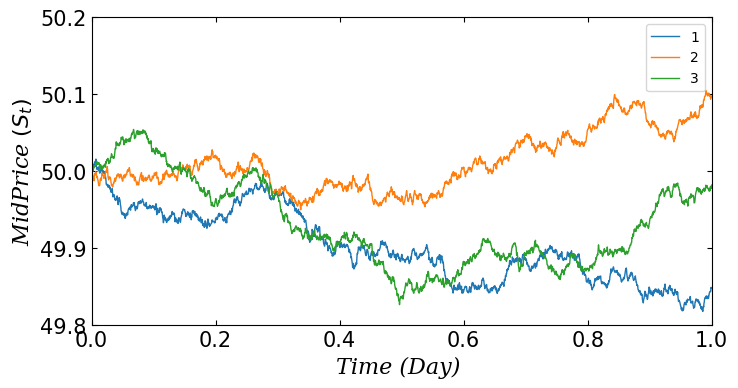

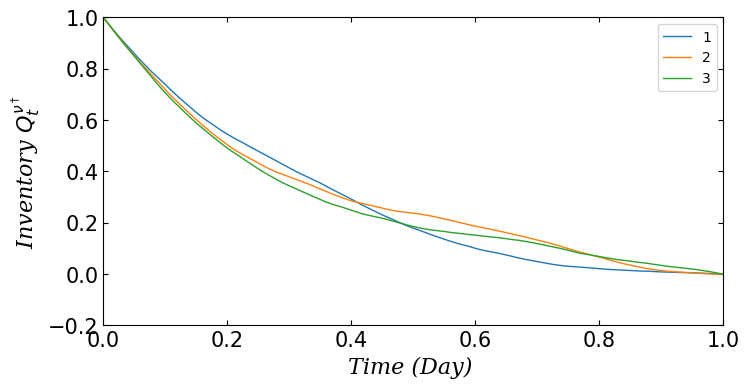

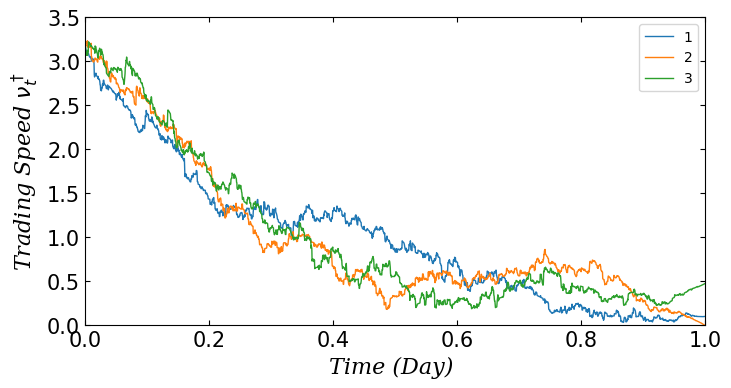

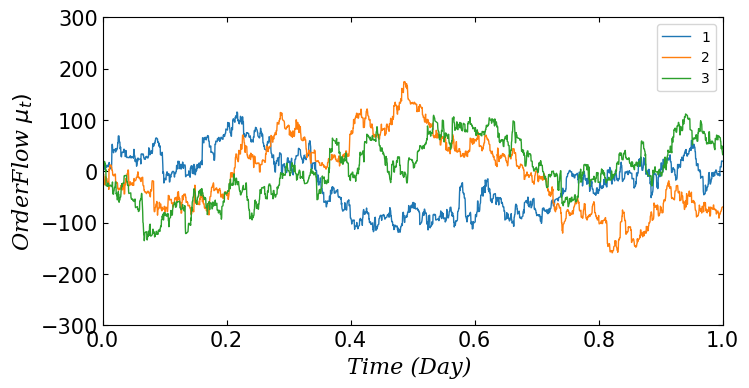

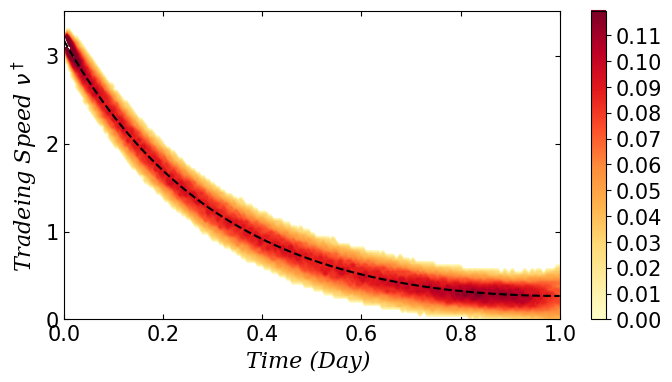

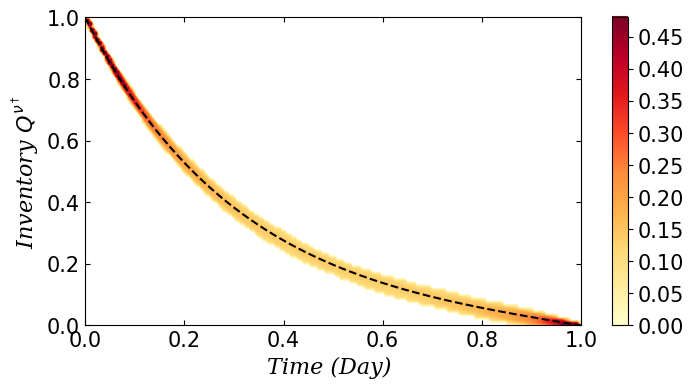

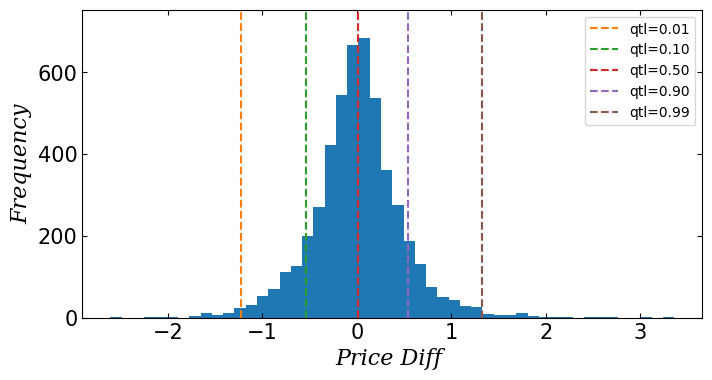

In [67]:
Nsims = 5000  # Number of simulations

# Time grid
T = 1  # Expiry
Ndt = int(6.5*360)  # Number of time increments
dt = T/Ndt  # Time change increment
t = np.arange(0, T+0.00000001, dt)  # Time increments vector 

k = 0.001  # Temporary Market Impact
b = 0.0001  # Permanent Price Impact Factor

lam = 1000 # Frequency of Arrival of Order-Flow Changes
kappa = 10  # Rate of Order-Flow Mean-reversion
eta_mean = 5  # Mean Order-Flow Jump Size

initial_price = 50  # Starting Fundamental Price
initial_invt = 1  # Starting Inventory amount
phi = 0.01  # Running penalty coefficient
sigma = 0.1  # Volatilty (recall this is an artihmetic model)

alpha = 100  # Terminal penalty 
idxfig = [52, 291, 9]  # Index of path to be plotted

# Computing chi variable
zeta = ((alpha-0.5*b) + (k*phi)**0.5)/((alpha-0.5*b) - (k*phi)**0.5)  
gamma = (phi/k)**0.5
tau = T-t  # Time remaining to the end of the trading horizon
chi = np.divide((k*phi)**0.5*(1 + zeta*np.exp(2*gamma*tau)), (1 - zeta*np.exp(2*gamma*tau)))

# Computing ell variable
def exp_p(a, tau):
    return (1 - np.exp(-a*tau)) / a
v1 = np.exp(gamma * tau)
tot = kappa + gamma
dif = kappa - gamma
ell = (zeta * v1 * exp_p(tot, tau) \
       - v1**-1 * exp_p(dif, tau) )\
            /(zeta * v1 - v1**-1)

# Allocate space for the processes we simulate and store

mu = np.full([Nsims, Ndt+1], np.nan)  # Order Flow matrix

# Initializing variables for simulation base on computed strategy
X = np.full([Nsims, Ndt+1], np.nan)  # Cost matrix of Strategy
Q = np.full([Nsims, Ndt+1], np.nan)  # Inventory matrix

S = np.full([Nsims, Ndt+1], np.nan)  # Execution Price matrix

nu = np.full([Nsims, Ndt+1], np.nan)  # Rate of Trading matrix

# Initializing variables for simulation of Almgren-Chriss strategy
X_AC = np.full([Nsims, Ndt+1], np.nan)  # Cost matrix of Strategy
Q_AC = np.full([Ndt+1], np.nan)  # Inventory matrix

S_AC = np.full([Nsims, Ndt+1], np.nan)  # Execution Price matrix

nu_AC = np.full([Ndt+1], np.nan)  # Execution Price matrix

# Initial  conditions
Q[:, 0] = initial_invt
mu[:, 0] = 0
S[:, 0] = initial_price  
X[:, 0] = 0 

Q_AC[0] = initial_invt 
S_AC[:, 0] = initial_price
X_AC[:, 0] = 0

#  Simulating computed strategy
for i in range(Ndt):

    # Compute optimal trading rate
    nu[:, i] = -1/k*chi[i]*Q[:, i] - 0.5 * b / k * ell[i] * mu[:, i]
    nu_AC[i] = -1/k*chi[i] * Q_AC[i]

    # Account for the cost of the trades above and update inventory
    X[:, i + 1] = X[:, i] + (S[:, i] - k * nu[:, i]) * nu[:, i] * dt
    Q[:, i+1] = Q[:, i] - nu[:, i] * dt
    
    # If you were trading using Almgren-Chriss this is what you would do
    X_AC[:, i + 1] = X_AC[:, i] + (S_AC[:, i] - k * nu_AC[i]) * nu_AC[i] * dt
    Q_AC[i+1] = Q_AC[i] - nu_AC[i] * dt

    # simulate the SDE for price forward 
    dW = dt**0.5 * np.random.randn(Nsims, 1)
    
    S[:, i + 1] = S[:, i] + b * (mu[:, i] - nu[:, i]) * dt + (sigma * dW).reshape(Nsims)
    S_AC[:, i + 1] = S_AC[:, i] + b * (mu[:, i] - nu_AC[i]) * dt + (sigma * dW).reshape(Nsims)
    
    #  simulate order-flow forward
    
    # decide if an order-flow update arrives
    dn = (np.random.rand(Nsims, 1) < 1 - np.exp(-2 * lam * dt)).astype(int)
    # decide if it adds to the buy/sell pressure
    buysell = (np.random.rand(Nsims, 1) < 0.5)
    # generate the size of the order-flow impact
    eta = -eta_mean * np.log(np.random.rand(Nsims, 1))
    
    # simulate the SDE for mu forward
    mu[:, i + 1] = mu[:, i]*np.exp(-kappa * dt) + (eta * dn * (2 * buysell - 1)).reshape(Nsims)

# Visualizing variables as time procresses 
PlotPath(t, T, S, idxfig, sigma, [initial_price - 2*sigma, initial_price + 2 * sigma], 'MidPrice ' + r'$(S_t)$')
PlotPath(t, T, Q, idxfig, sigma, [-2*sigma, initial_invt],'Inventory ' + r'$Q_t^{\nu^\dagger}$')
PlotPath(t, T, nu, idxfig, sigma, [0, 3.5], 'Trading Speed ' + r'$\nu_t^\dagger$')
PlotPath(t, T, mu, idxfig, sigma, [-300, 300], 'OrderFlow ' + r'$\mu_t)$')

# Visualizing density plot of simulations
PlotHeatMap(t, nu, nu_AC, 'Tradeing Speed ' + r'$\nu^\dagger$', n=40)
PlotHeatMap(t, Q, Q_AC, 'Inventory ' + r'$Q^{\nu^\dagger}$', n=40, lower_threshold=0.05, upper_threshold=0.4)

# Visualizing price difference between strategies 
fig_7 = plt.figure()
plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True)
BasisPointSavings = ( X[:,-1]-X_AC[:, -1] ) / X_AC[:, -1] * 10**4

rets = plt.hist(BasisPointSavings, bins=50)

prob = [0.01, 0.1, 0.5, 0.9, 0.99]
q = np.quantile(BasisPointSavings, prob)
maxHeight = 1.1*np.max(rets[0])
for i in range(len(q)):
    plt.plot(q[i]*np.array([1,1]), np.array([0,maxHeight]), '--', label= prob[i])
plt.ylim((0,maxHeight))  
plt.ylabel('Frequency', fontdict=font)
plt.xlabel('Price Diff ', fontdict=font)
plt.legend(('qtl=0.01','qtl=0.10','qtl=0.50','qtl=0.90','qtl=0.99'))
plt.show()

# Optimal liquidation in lit and dark markets 

**Dark pool** : "...systems that allow participants to enter unpriced orders to buy and sell securities, these orders are crossed at a specified time at a price derived from another market... " In dark pool the agent may have to wait for some time until a matching order arrive so that his order is executed (execution risk), but on the other hand does not receive the additional temporary price impact of walking the LOB. 

We analyse the case when the agent trades continuously in the lit market and simultaneously posts orders in the dark pool with the aim to liquidate n shares. In addition to trading in the lit marke, the agent posts $y_{t} \le q_{t}$ units of inventory in the dark pool, where $q_{t} \le n$ are the remaining shares to be liquidated. There is no price impact in the dark, so the agent receives $S_{t}$ per share for each unit executed which is not necessarily the whole amount $y_{t}$. Furthermore, other makret participants send matching orders to the dark pool which are assumed to arrive at Poisson times $\lambda$ and the volume associated with the orders are independent. The total volume of buy orders (which may match the agent's posted sell order) placed in the dark pool ip to time t is the compound poisson process $v_{t} = \sum_{n=1}^{Nt} \epsilon_{n}$

$dQ_{t}^{v, y} = - v_{t} dt - min(Y_{t}, \epsilon_{1 + Nt})$ The matching order in the dark pool may be smaller or bigger. We suppose that the agent is at the front of the queue to be executed in the dark market.

Therefore $v_{t}^{*} = - \frac{1}{k} h_{2}(t)Q_{t}^{v*, y*}$ and $ y_{t}^{*} = Q_{t}^{v*, y*} = e^{(\frac{\zeta^{-}}{k})t}(\frac{1- \beta e^{- \gamma (T - t)}}{1- \beta e^{- \gamma (T)}})n$

$\zeta^{\pm} = \frac{1}{2} k \lambda \pm \sqrt{\frac{1}{4}k^{2}\lambda^{2} + k \phi}$

$h_{2}(t) = \frac{\zeta^{-}-\zeta^{+} \beta^{- \gamma (T-t)}}{1-\beta^{- \gamma (T-t)}}$

$\beta = \frac{\alpha + \zeta^{-}}{\alpha + \zeta^{+}}$

$\gamma = \frac{1}{k}(\zeta^{+} - \zeta^{-})$ 

It is clear that the optimal amount to send to the dark pool is always what remains to be liquidated. This makes sense because in our model there is no market impact in the dark pool so the agent obtains the midprice for orders that are crossed in the dark pool. The more interesting part of the liquidation strategy is how much the agent should send to the lit markets. When $\lambda=0$, the optimal speed of trading in the lit market is that given by the AC solution. When $\lambda > 0$ the agent start trading slower than the AC speed in the lit  market to allow for the potential of dark pool executuion, but then as time runs out and no execution occur, the rate of trading increases to compensate for the initially slow trading. When $\lambda$ -> $\infty$, the agent does not trade at all in the lit market.